# **Dataset - HR Data MNC (Regressão)**

O objetivo do grupo ao analisar esse dataset é, por meio dos dados de Recursos Humanos de uma multinacional, descobrir qual o salário dos funcionários.

## **1. Inserção das bibliotecas e leitura dos arquivos**

Nessa etapa será feita a leitura do arquivo (dataset) a ser analisado pelo grupo, além da criação do dataframe.

#### Imports Python

In [4]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None) # Para mostrar todas as colunas no .describe()

#### Leitura do Dataset

In [5]:
df_salario = pd.read_csv('Salario/HR_Data_MNC_Data Science Lovers.csv', encoding='latin1')
df_final = df_salario # dataframe para utilizar em pré processamento e predições

In [6]:
df_salario.head()

,Unnamed: 0,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
0,0,EMP0000001,Joshua Nguyen,IT,Software Engineer,2011-08-10,"Isaacland, Denmark",5,14,Resigned,On-site,1585363
1,1,EMP0000002,Julie Williams,Marketing,SEO Specialist,2018-03-02,"Anthonyside, Costa Rica",2,7,Active,On-site,847686
2,2,EMP0000003,Alyssa Martinez,HR,HR Manager,2023-03-20,"Port Christinaport, Saudi Arabia",1,2,Active,On-site,1430084
3,3,EMP0000004,Nicholas Valdez,IT,Software Engineer,2023-10-12,"Port Shelbychester, Antigua and Barbuda",1,1,Active,On-site,990689
4,4,EMP0000005,Joel Hendricks,Operations,Logistics Coordinator,2024-12-09,"Lake Kimberly, Palestinian Territory",5,0,Active,On-site,535082


## **2. Análise Exploratória dos Dados**

PLACEHOLDER

O grupo iniciou utilizando a função .info() do dataframe, para verificar contagem total de valores não nulos e o tipo de dado de cada coluna.

In [7]:
df_salario.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   Unnamed: 0          2000000 non-null  int64 
 1   Employee_ID         2000000 non-null  object
 2   Full_Name           2000000 non-null  object
 3   Department          2000000 non-null  object
 4   Job_Title           2000000 non-null  object
 5   Hire_Date           2000000 non-null  object
 6   Location            2000000 non-null  object
 7   Performance_Rating  2000000 non-null  int64 
 8   Experience_Years    2000000 non-null  int64 
 9   Status              2000000 non-null  object
 10  Work_Mode           2000000 non-null  object
 11  Salary_INR          2000000 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 183.1+ MB


In [8]:
df_salario.describe(include='all')

,Unnamed: 0,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
count,2.000000e+06,2000000,2000000,2000000,2000000,2000000,2000000,2.000000e+06,2.000000e+06,2000000,2000000,2.000000e+06
unique,NaN,2000000,467487,7,29,5479,1593497,NaN,NaN,4,2,NaN
top,NaN,EMP0000001,Michael Smith,IT,Software Engineer,2022-10-31,"Lake Michael, Congo",NaN,NaN,Active,On-site,NaN
freq,NaN,1,1014,601042,300358,622,20,NaN,NaN,1401558,1199109,NaN
mean,9.999995e+05,NaN,NaN,NaN,NaN,NaN,NaN,3.000148e+00,5.010287e+00,NaN,NaN,8.968878e+05
std,5.773504e+05,NaN,NaN,NaN,NaN,NaN,NaN,1.413973e+00,3.608823e+00,NaN,NaN,4.026103e+05
min,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,0.000000e+00,NaN,NaN,3.000000e+05
25%,4.999998e+05,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+00,2.000000e+00,NaN,NaN,6.163460e+05
50%,9.999995e+05,NaN,NaN,NaN,NaN,NaN,NaN,3.000000e+00,5.000000e+00,NaN,NaN,8.110265e+05
75%,1.499999e+06,NaN,NaN,NaN,NaN,NaN,NaN,4.000000e+00,8.000000e+00,NaN,NaN,1.073745e+06


A primeira grande observação do grupo foi referente a coluna 'Unnamed: 0', a qual posuia a mesma função de um index. Portanto o grupo pretende removê-la durante o Pré Processamento (removida agora em um dataframe da EDA para evitar possíveis erros nesta etapa).

In [9]:
df_salario = df_salario.drop(columns='Unnamed: 0')

Após remoção, o grupo optou por checar a distribuição de funcionários por área nesse dataset.

<Axes: xlabel='Department', ylabel='Count'>

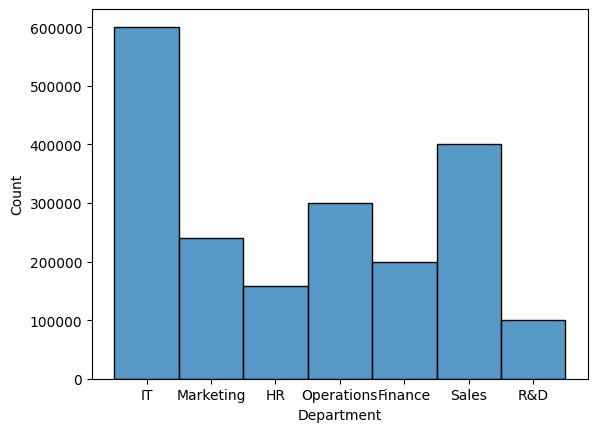

In [10]:
import seaborn as sns
sns.histplot(data=df_salario, x="Department")

Dando segmento na EDA, o grupo optou por executar um conjunto de histogramas para visualizar a distribuição dos dados entre as diferentes features numéricas. É possível observar que a performance está perfeitamente distribuída, enquanto o salário apresenta uma distribuição ruim.

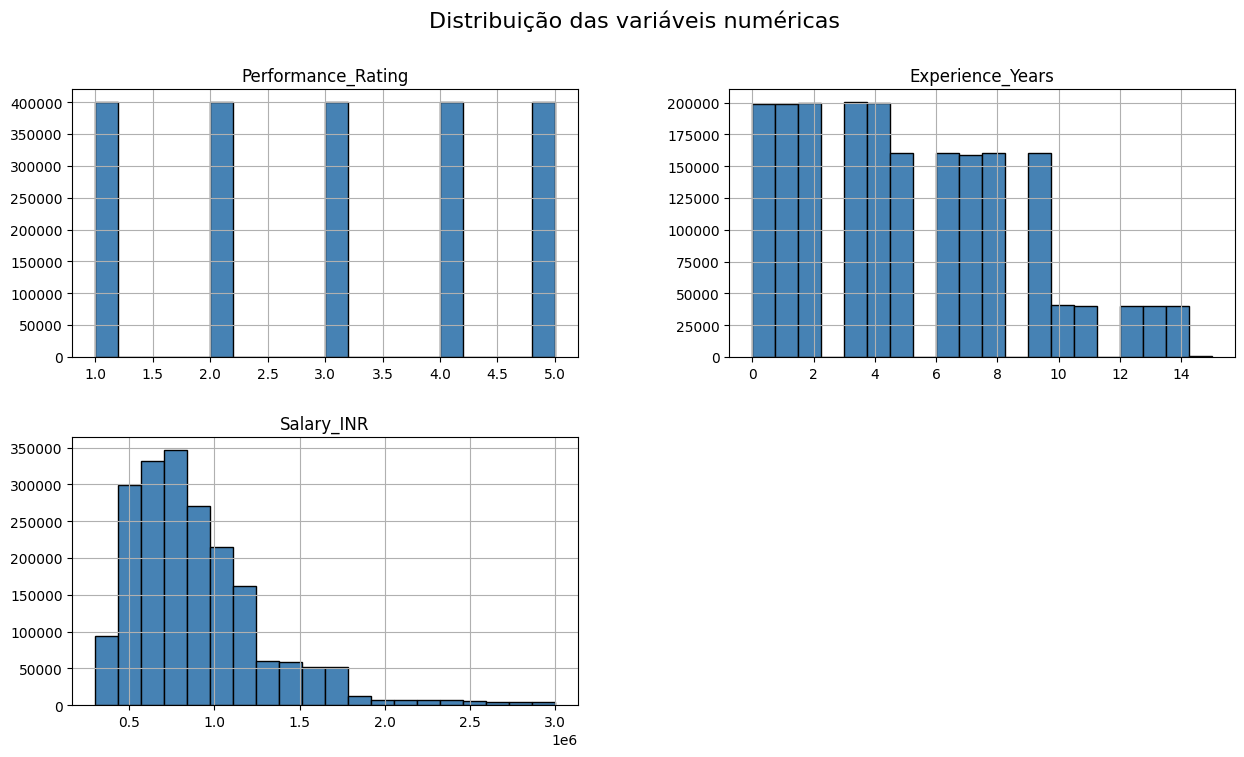

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

df_salario.hist(bins=20, figsize=(15, 8), color='steelblue', edgecolor='black')
plt.suptitle('Distribuição das variáveis numéricas', fontsize=16)
plt.show()


Para entender a concentração dos dados mal distribuídos do salário, o grupo optou por realizar um boxplot, de forma a observar o percentual de valores discrepantes.

<Axes: >

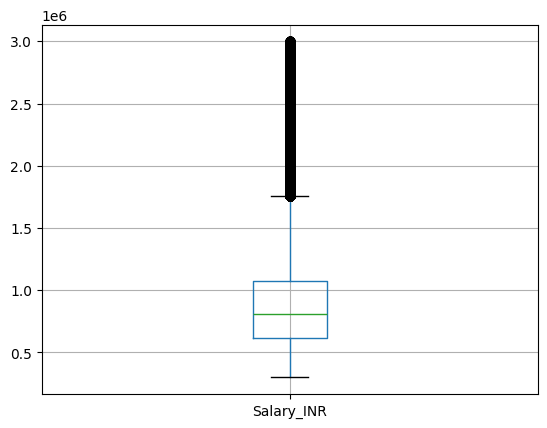

In [12]:
df_salario.boxplot(column='Salary_INR')

Após realização do boxplot, o grupo optou por reduzir o dataframe em 10% pra cima e 10% p baixo, de forma a tentar excluir o excesso de outliers. É possível ver que após a remoção os Outliers não são mais identificados. - *Eu (Leo) acho que 10% é muito, mas considerando a qtd de dados acho reasonable até. Mas quero checar o fabricio.*

<Axes: >

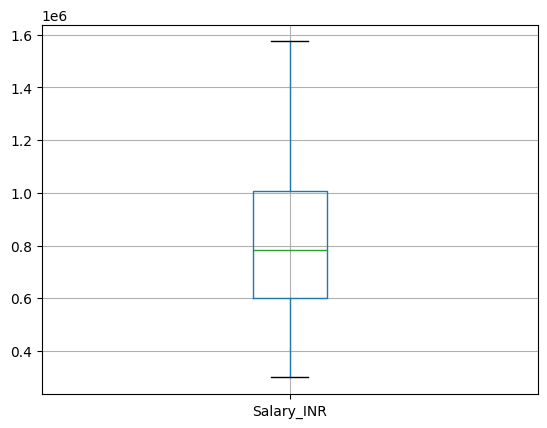

In [13]:
q_alto = 0.93

limite_alto = df_salario['Salary_INR'].quantile(q_alto)

df_podado = df_salario[
    (df_salario['Salary_INR'] <= limite_alto)
]

df_podado.boxplot(column='Salary_INR')

Checar se fazemos algo ou não

<Axes: xlabel='Department', ylabel='Count'>

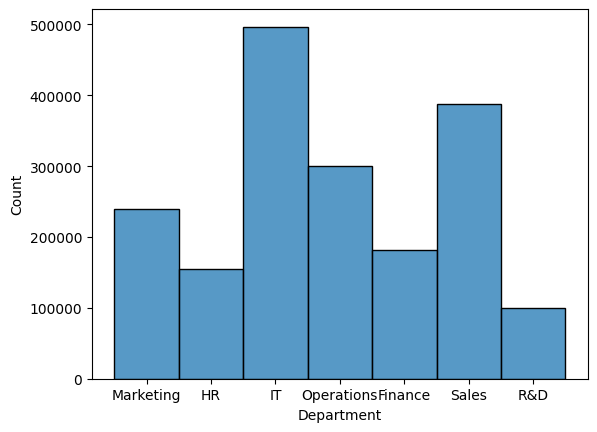

In [14]:
sns.histplot(data=df_podado, x="Department")

In [15]:
df_corr = df_podado.copy()

In [16]:
df_corr['Work_Mode'].unique()

array(['On-site', 'Remote'], dtype=object)

In [17]:
mapeamento_work_mode = {'Remote': 0, 'On-site': 1}
df_corr['WorkMode_Num'] = df_corr['Work_Mode'].map(mapeamento_work_mode)

In [18]:
mapeamento_status = {'Resigned': 0, 'Active': 1, 'Terminated': 2, 'Retired': 3}
df_corr['Status_Num'] = df_corr['Status'].map(mapeamento_status)

In [19]:
df_corr.corr(numeric_only=True).style.background_gradient(cmap= 'Blues')

,Performance_Rating,Experience_Years,Salary_INR,WorkMode_Num,Status_Num
Performance_Rating,1.000000,-0.000222,0.000025,-0.000214,-0.000270
Experience_Years,-0.000222,1.000000,0.000976,-0.000322,0.000565
Salary_INR,0.000025,0.000976,1.000000,-0.000059,-0.001745
WorkMode_Num,-0.000214,-0.000322,-0.000059,1.000000,0.000648
Status_Num,-0.000270,0.000565,-0.001745,0.000648,1.000000


Para complementar a análise de correlação, o grupo realizou um gráfico de disperção com todas as classes do dataset, para tentar observar de forma gráfica onde os valores se encontram e como se correlacionam entre diferentes classes (a linha foi comentada para reduzir o tempo de execução do programa. O resultado está na pasta Salario, arquivo DispersaoSalario.png).

In [20]:
df_splot = df_corr[['Performance_Rating', 'Experience_Years', 'Salary_INR',	'WorkMode_Num',	'Status_Num', 'Department' , 'Location']]
#sns.pairplot(df_splot, hue='Department', height=3.5, diag_kind='hist')

Seguindo com a EDA e com base nos resultados obtidos por meio do gráfico de dispersão, o grupo optou por realizar um histograma e o boxplot para enxergar a dispersão salarial com base nas áreas. É possível perceber que IT e Finance possuem os funcionários com a maior faixa salarial da empresa.

<Axes: xlabel='Salary_INR', ylabel='Count'>

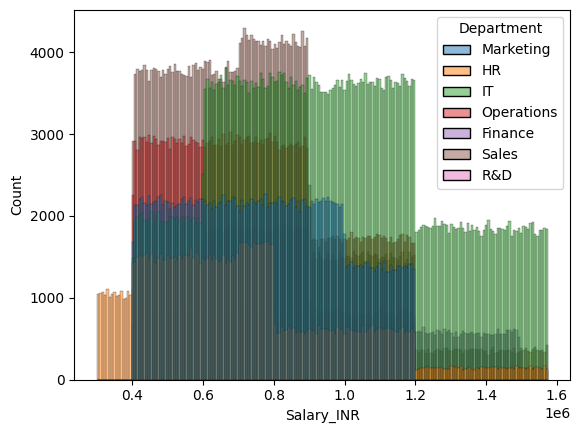

In [21]:
sns.histplot(data=df_splot, x="Salary_INR", hue="Department")

Para obter uma visualização limpa da dispersão salarial em cada área, foi gerado múltiplos histogramas, um para cada departamento.

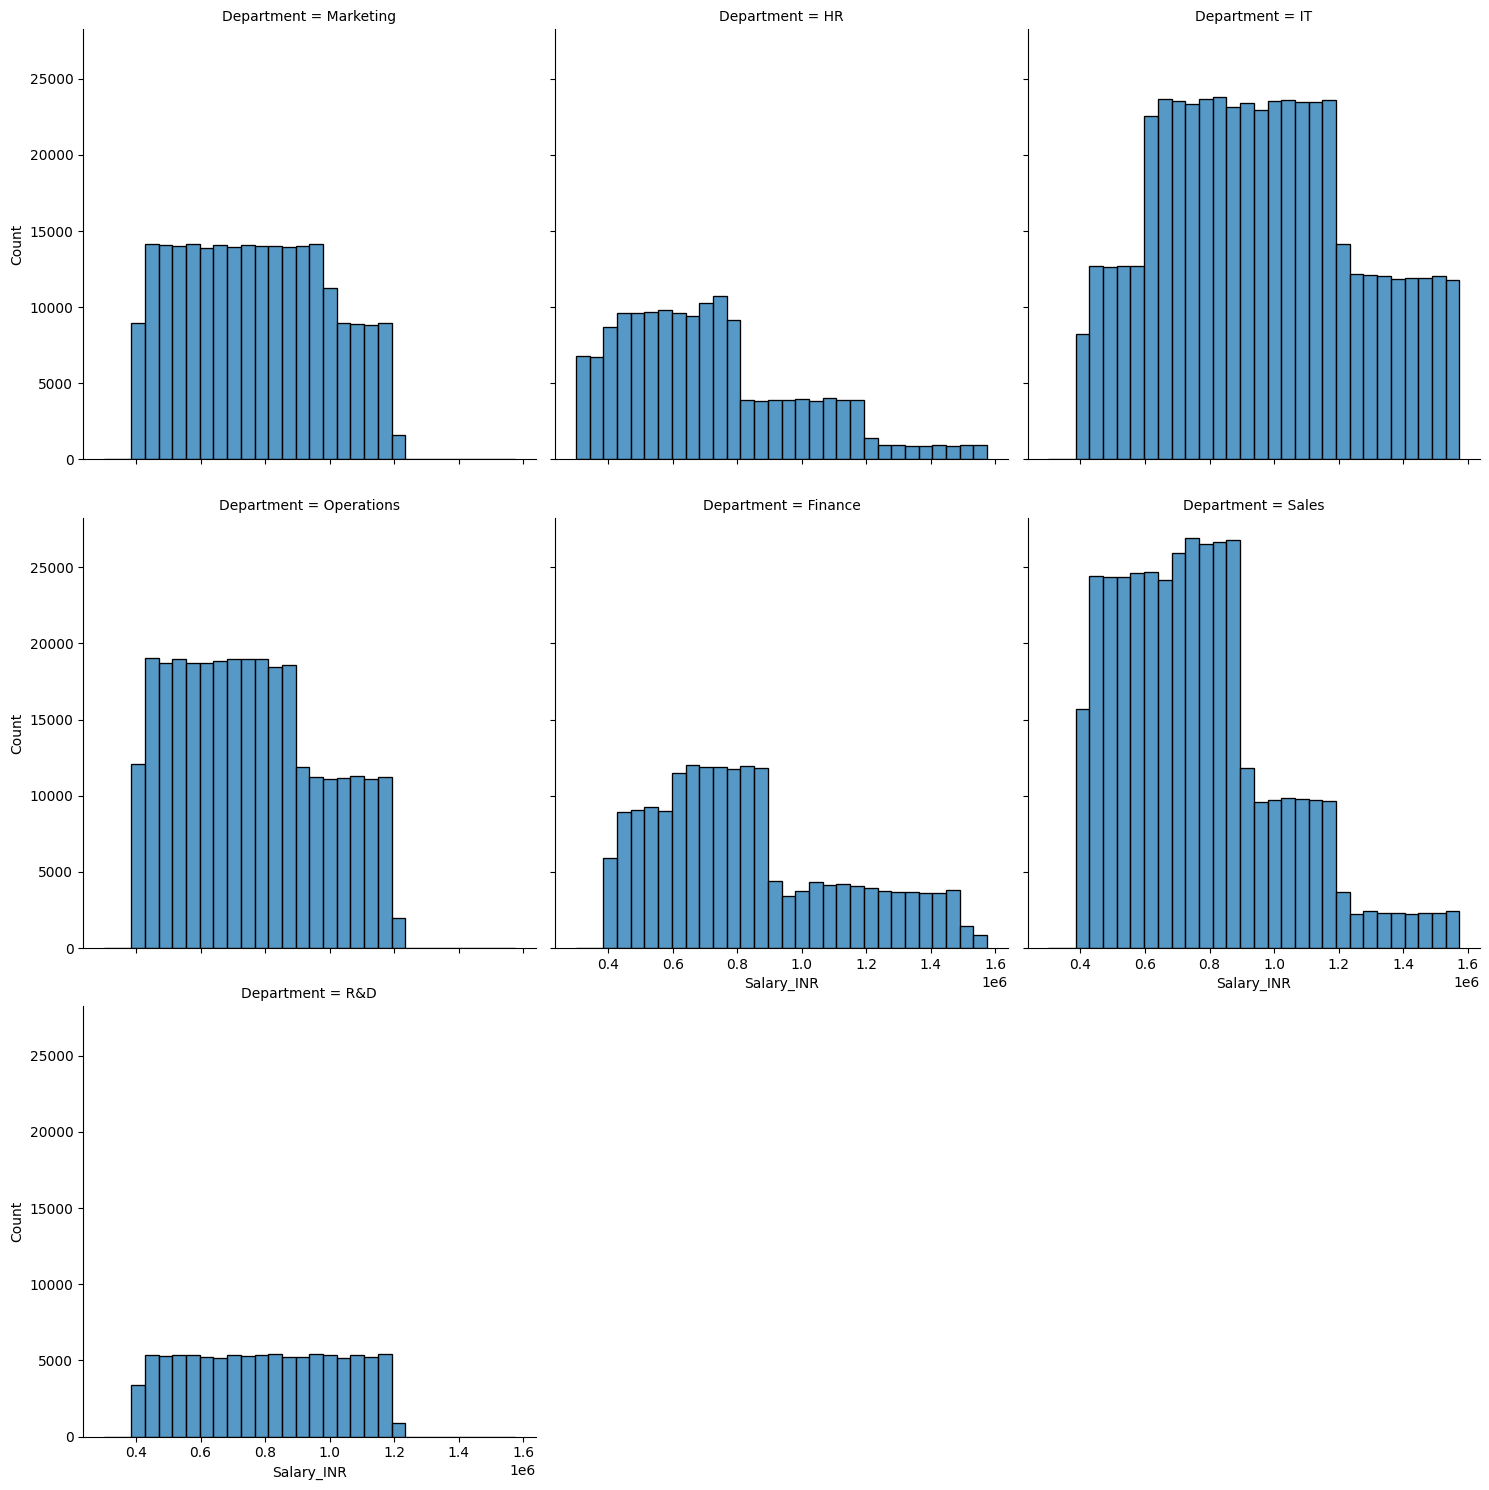

In [22]:
sns.displot(data=df_splot, x="Salary_INR", col="Department", col_wrap=3, kind="hist", bins=30)

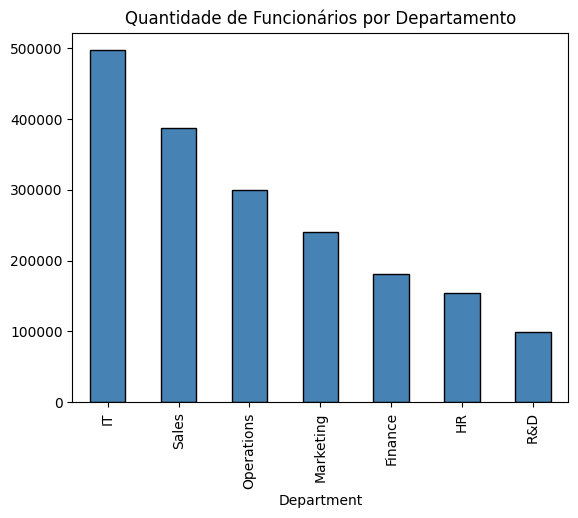

In [23]:
df_podado['Department'].value_counts().plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Quantidade de Funcionários por Departamento')
plt.show()


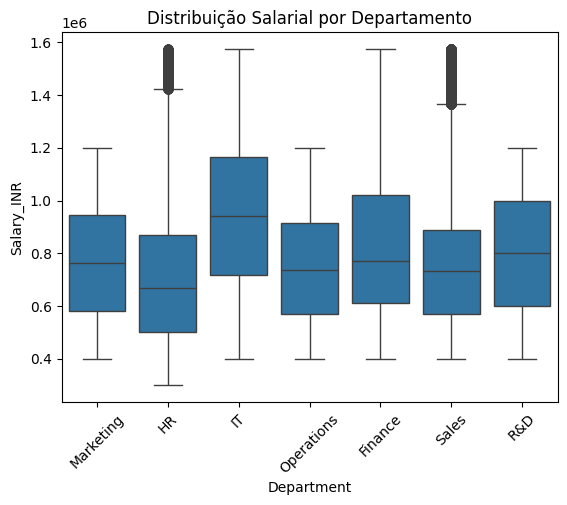

/home/andre/Área de trabalho/dev_facens/IA/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


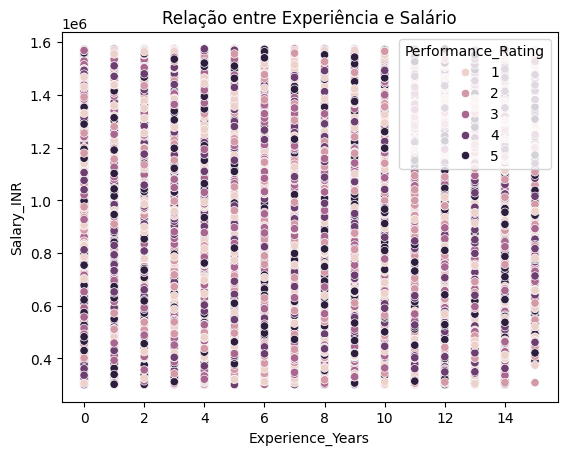

In [24]:
sns.boxplot(x='Department', y='Salary_INR', data=df_podado)
plt.title('Distribuição Salarial por Departamento')
plt.xticks(rotation=45)
plt.show()

sns.scatterplot(x='Experience_Years', y='Salary_INR', hue='Performance_Rating', data=df_podado)
plt.title('Relação entre Experiência e Salário')
plt.show()


## **2. Etapa de Pré-Processamento**

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("Salario/HR_Data_MNC_Data Science Lovers.csv")

print("Pré-visualização dos dados:")
display(df.head())

print("\nColunas disponíveis no dataset:")
print(df.columns.tolist())


Pré-visualização dos dados:


,Unnamed: 0,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
0,0,EMP0000001,Joshua Nguyen,IT,Software Engineer,2011-08-10,"Isaacland, Denmark",5,14,Resigned,On-site,1585363
1,1,EMP0000002,Julie Williams,Marketing,SEO Specialist,2018-03-02,"Anthonyside, Costa Rica",2,7,Active,On-site,847686
2,2,EMP0000003,Alyssa Martinez,HR,HR Manager,2023-03-20,"Port Christinaport, Saudi Arabia",1,2,Active,On-site,1430084
3,3,EMP0000004,Nicholas Valdez,IT,Software Engineer,2023-10-12,"Port Shelbychester, Antigua and Barbuda",1,1,Active,On-site,990689
4,4,EMP0000005,Joel Hendricks,Operations,Logistics Coordinator,2024-12-09,"Lake Kimberly, Palestinian Territory",5,0,Active,On-site,535082



Colunas disponíveis no dataset:
['Unnamed: 0', 'Employee_ID', 'Full_Name', 'Department', 'Job_Title', 'Hire_Date', 'Location', 'Performance_Rating', 'Experience_Years', 'Status', 'Work_Mode', 'Salary_INR']


Limpeza de dados e remoção de outliers

Tamanho original: 2000000, após remoção de outliers: 1930702


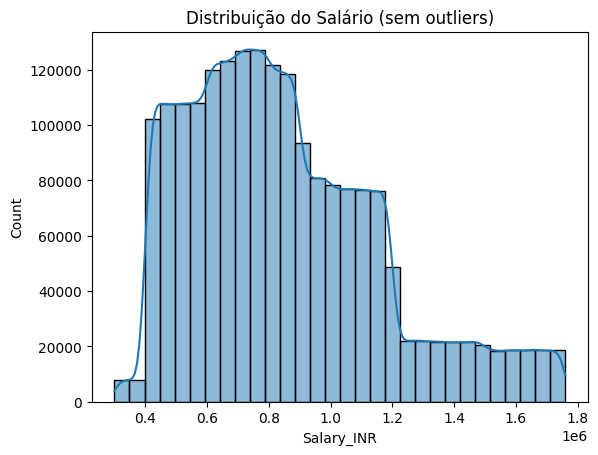

In [26]:
def remove_outliers(df, col):
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

# Aplicando remoção de outliers nas colunas numéricas principais
df_clean = remove_outliers(df, 'Salary_INR')
df_clean = remove_outliers(df_clean, 'Experience_Years')
df_clean = remove_outliers(df_clean, 'Performance_Rating')

print(f"Tamanho original: {len(df)}, após remoção de outliers: {len(df_clean)}")

# Visualização da distribuição do salário
sns.histplot(df_clean['Salary_INR'], bins=30, kde=True)
plt.title("Distribuição do Salário (sem outliers)")
plt.show()


Criação de colunas numéricas e mapeamento


In [27]:
df_final = df_clean.copy()

mapeamento_work_mode = {'Remote': 0, 'On-site': 1}
mapeamento_status = {'Resigned': 0, 'Active': 1, 'Terminated': 2, 'Retired': 3}

df_final['WorkMode_Num'] = df_final['Work_Mode'].map(mapeamento_work_mode)
df_final['Status_Num'] = df_final['Status'].map(mapeamento_status)

Transformação logarítmica do salário


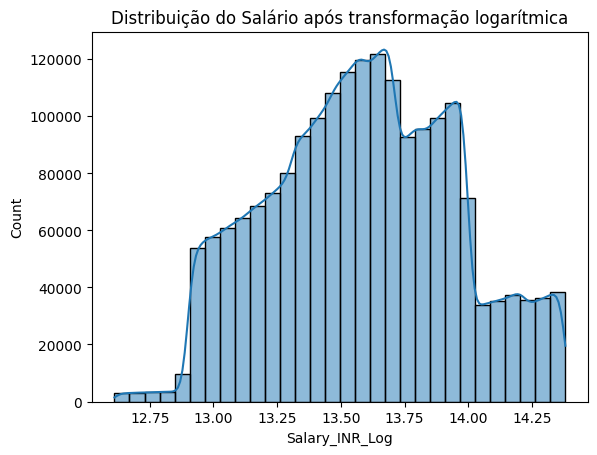

In [28]:
df_final['Salary_INR_Log'] = np.log1p(df_final['Salary_INR'])

sns.histplot(df_final['Salary_INR_Log'], bins=30, kde=True)
plt.title("Distribuição do Salário após transformação logarítmica")
plt.show()

Seleção de features e divisão treino/teste


In [29]:
X = df_final[['Performance_Rating', 'Experience_Years', 'WorkMode_Num', 'Status_Num']]
y = df_final['Salary_INR_Log']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Dimensões dos conjuntos:")
print(f"Treino: {X_train.shape}, Teste: {X_test.shape}")

Dimensões dos conjuntos:
Treino: (1544561, 4), Teste: (386141, 4)


Normalização dos dados


In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nExemplo dos dados normalizados:")
print(X_train_scaled[:5])



Exemplo dos dados normalizados:
[[ 2.20243233e-04 -1.38870721e+00  8.17465635e-01  7.39304867e-02]
 [ 2.20243233e-04  1.10588988e+00 -1.22329301e+00  7.39304867e-02]
 [ 1.41468639e+00  5.51534970e-01  8.17465635e-01  7.39304867e-02]
 [ 1.41468639e+00 -1.11152976e+00 -1.22329301e+00 -1.42284038e+00]
 [ 1.41468639e+00  8.28712425e-01  8.17465635e-01  7.39304867e-02]]


In [31]:
print("\nColunas finais utilizadas:")
print(X.columns.tolist())

print("\nVisualização final do DataFrame pronto para modelagem:")
display(df_final.head())


Colunas finais utilizadas:
['Performance_Rating', 'Experience_Years', 'WorkMode_Num', 'Status_Num']

Visualização final do DataFrame pronto para modelagem:


,Unnamed: 0,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR,WorkMode_Num,Status_Num,Salary_INR_Log
0,0,EMP0000001,Joshua Nguyen,IT,Software Engineer,2011-08-10,"Isaacland, Denmark",5,14,Resigned,On-site,1585363,1,0,14.276325
1,1,EMP0000002,Julie Williams,Marketing,SEO Specialist,2018-03-02,"Anthonyside, Costa Rica",2,7,Active,On-site,847686,1,1,13.650267
2,2,EMP0000003,Alyssa Martinez,HR,HR Manager,2023-03-20,"Port Christinaport, Saudi Arabia",1,2,Active,On-site,1430084,1,1,14.173244
3,3,EMP0000004,Nicholas Valdez,IT,Software Engineer,2023-10-12,"Port Shelbychester, Antigua and Barbuda",1,1,Active,On-site,990689,1,1,13.806157
4,4,EMP0000005,Joel Hendricks,Operations,Logistics Coordinator,2024-12-09,"Lake Kimberly, Palestinian Territory",5,0,Active,On-site,535082,1,1,13.190177


## **3. Modelos de Regressão**

In [32]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

**KNN**

In [34]:
def avaliar_modelo(nome, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"🔹 {nome}")
    print(f"MAE: {mae:.4f} | RMSE: {rmse:.4f} | R²: {r2:.4f}\n")

knn = KNeighborsRegressor(n_neighbors=5, algorithm='ball_tree', n_jobs=-1)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
avaliar_modelo("K-Nearest Neighbors", y_test, y_pred_knn)

🔹 K-Nearest Neighbors
MAE: 0.3253 | RMSE: 0.3997 | R²: -0.2062



**Naive Bayes (para regressão adaptada via classificação contínua)**

In [35]:
nb = GaussianNB()
nb.fit(X_train_scaled, y_train.astype(int))  # arredonda o target apenas para fins experimentais
y_pred_nb = nb.predict(X_test_scaled)
print("Naive Bayes -> R2:", r2_score(y_test.astype(int), y_pred_nb))

Naive Bayes -> R2: -0.022631787787716906


**Decision Tree**

In [36]:
tree = DecisionTreeRegressor(max_depth=5, random_state=42)
tree.fit(X_train_scaled, y_train)
y_pred_tree = tree.predict(X_test_scaled)
print("DecisionTree -> MAE:", mean_absolute_error(y_test, y_pred_tree), 
      "RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_tree)),
      "R2:", r2_score(y_test, y_pred_tree))

DecisionTree -> MAE: 0.29839618610644236 RMSE: 0.36398086021578163 R2: -6.680503237643798e-05


**Regressão Linear**

In [37]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print("LinearRegression -> MAE:", mean_absolute_error(y_test, y_pred_lr), 
      "RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)),
      "R2:", r2_score(y_test, y_pred_lr))

LinearRegression -> MAE: 0.2983897440187389 RMSE: 0.36397175539892 R2: -1.677321905657614e-05


**Rede Neural**

In [38]:
mlp = MLPRegressor(hidden_layer_sizes=(64,32), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred_mlp = mlp.predict(X_test_scaled)
print("MLP -> MAE:", mean_absolute_error(y_test, y_pred_mlp), 
      "RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_mlp)),
      "R2:", r2_score(y_test, y_pred_mlp))

MLP -> MAE: 0.29996212239017145 RMSE: 0.3659391159439044 R2: -0.010856683995937644
